# Online Portfolio Selection - Pattern Matching

## 1. Correlation Driven Nonparametric Learning

### 1.1 Correlation Driven Nonparametric Learning (CORN)

Correlation Driven Nonparametric Learning strategies look at historical market sequences to identify similarly correlated periods. Existing pattern matching strategies attempt to exploit and identify the correlation between different market windows by using the Euclidean distance to measure the similarity between two market windows. However, the traditional Euclidean distance between windows does not effectively capture the linear relation. CORN utilizes the Pearson correlation coefficient instead of Euclidean distances to capture the whole market direction.


### 1.2 Correlation Driven Nonparametric Learning - Uniform (CORN-U)

Because the CORN strategies are dependent on the parameters, we propose a more generic one that takes an ensemble approach to reduce variability. One possible CORN ensemble is the CORN-U method.

CORN-U generates a set of experts with different window sizes and the same $\rho$ value. After all the expert's weights are calculated, weights are evenly distributed among all experts to represent the strategy as a universal portfolio.


### 1.3 Correlation Driven Nonparametric Learning - K (CORN-K)

CORN-K further improves the CORN-U by generating more parameters of experts. There is more variability as different ranges of window and $\rho$ value are considered to create more options.

The most important part of the CORN-K, however, is the capital allocation method. Unlike CORN-U, which uniformly distributes capital among all the experts, CORN-K selects the top-k best performing experts until the last period and equally allocate capital among them. This prunes the experts that have less optimal returns and puts more weight on the performing ones.


## 2. Symmetric Correlation Driven Nonparametric Learning (SCORN)

Market symmetry is a concept that the markets have mirrored price movements. Increasing price trends represents a mirror of a decreasing trend. This gives us an intuitional understanding that if the price movements are strongly negatively correlated, the optimal portfolio weights should minimize the returns or the losses from those periods as it is most likely that the optimal portfolio weights would be the inverse.

Introduced recently in a Journal of Financial Data Science paper by Yang Wang and Dong Wang in 2019, SCORN identifies positively correlated windows and negatively correlated windows.

The positiviely correlated windows are identified similar to the process for CORN.

## 3. Functional Correlation Driven Nonparametric Learning (FCORN)

FCORN further extends the SCORN by introducing a concept of an activation function. Applying the concept to the previous CORN algorithms, the activation function for the SCORN can be considered as a piecewise function. For any value between the positive and negative value of the threshold, we discount the importance of the period by placing a constant of 0.

Instead of completely neglecting windows with correlation with absolute value less than the threshold, FCORN introduces a sigmoid function that places a set of different weights depending on the correlation to the current market window. By replacing with such a variable, it is possible for us to place different importance on the correlated periods. One that has higher correlation will have higher weights of importance whereas ones that are less correlated will have less importance on it.

In [1]:
import pandas as pd
import numpy as np
import pickle
import optuna
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots 
pio.renderers.default = "svg" # Toggle for GitHub rendering

from mlfinlab.online_portfolio_selection import *

In [4]:
#msci = pd.read_csv('data/MSCI.csv', parse_dates=True, index_col='Date').dropna()[1:]
#us_equity = pd.read_csv('data/US_Equity.csv', parse_dates=True, index_col='Date')
#djia = pd.read_csv('data/DJIA.csv', parse_dates=True, index_col='Date')
#nyse = pd.read_csv('data/NYSE.csv', parse_dates=True, index_col='Date')
#sp500 = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='Date')
#tse = pd.read_csv('data/TSE.csv', parse_dates=True, index_col='Date')
data = pd.read_csv('sp_500.csv', parse_dates=True, index_col='date')
data = data.dropna(axis=1)

In [5]:
# Load Optuna Study.
equity_corn = optuna.load_study(study_name='corn', storage='sqlite:///stored/equity.db')
equity_cornu = optuna.load_study(study_name='cornu', storage='sqlite:///stored/equity.db')
equity_scorn = optuna.load_study(study_name='scorn', storage='sqlite:///stored/equity.db')
equity_fcorn = optuna.load_study(study_name='fcorn', storage='sqlite:///stored/equity.db')

### CORN

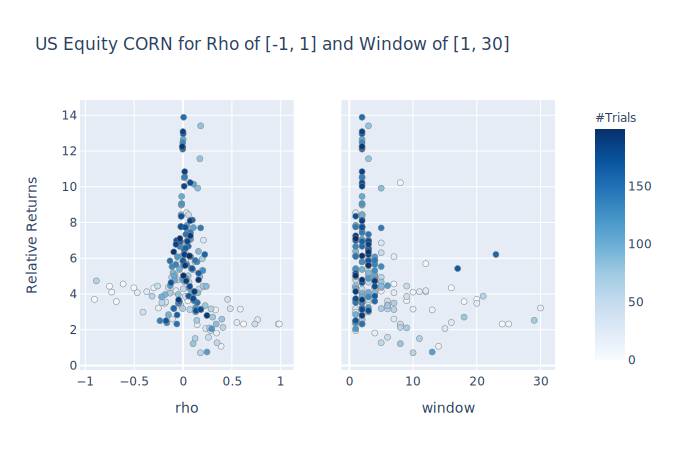

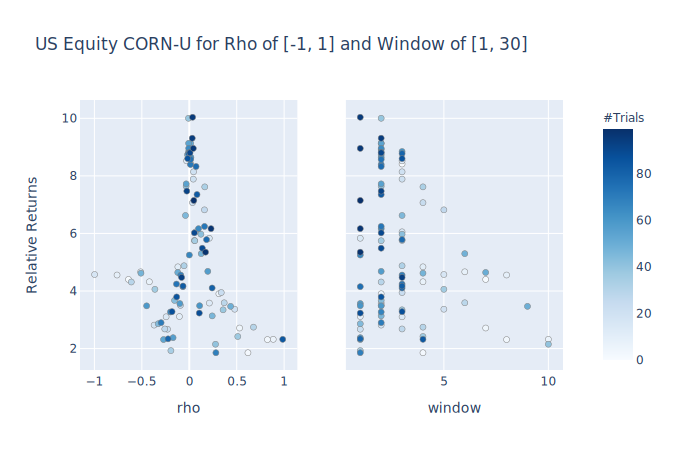

In [6]:
# US Equity CORN
fig = optuna.visualization.plot_slice(equity_corn)
fig.update_layout(title_text="US Equity CORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

# US Equity CORN-U
fig = optuna.visualization.plot_slice(equity_cornu)
fig.update_layout(title_text="US Equity CORN-U for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The CORN data with US Equity provides the most interesting results as this is directly applicable to a more modern timeline. Highest returns typically congregated around rho of 1 and a window of 2. In a way, the rho of 0 implies that any past history window with a non-negative correlation should be incorporated in the calculation, and a window of 2 indicates that a price trend should be looked at in a 2-day rolling window for correlation calculations.

### CORN-K

In [7]:
# Pickled study for US Equity CORN-K with different parameters.
with open('pickled/equity_cornk.pickle', 'rb') as fout:
    equity_cornk = pickle.load(fout)
equity_cornk = pd.DataFrame(equity_cornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [8]:
equity_cornk.head()

,Window,Rho,K,Returns
36,2.0,5.0,2.0,11.046960
10,1.0,5.0,1.0,10.785977
76,3.0,5.0,2.0,10.117304
64,3.0,4.0,2.0,9.277006
45,3.0,1.0,1.0,9.142067


In [9]:
#plot_k(equity_cornk, "US Equity CORN-K Window of [1, 5] and Rho of [1, 5]")

In [ ]:
# US Equity CORN-K with highest returns.
equity_cornk_ = CORNK(window=2, rho=5, k=2)
equity_cornk_.allocate(data, verbose=True)

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/mlfinlab/online_portfolio_selection/corn.py:100: RuntimeWarning:

invalid value encountered in log



Progress: |█████---------------------------------------------| 10.0% Complete

CORN-K provides a similar analysis as CORN with a window of 2 and rho of 1 having the highest returns. Based on the darkness of the circles for all rho values of 1, we can also notice that most parameters with k values of 1 had significant returns.

### SCORN

In [ ]:
# US Equity SCORN
fig = optuna.visualization.plot_slice(equity_scorn)
fig.update_layout(title_text="US Equity SCORN for Rho of [-1, 1] and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

There is less of a distinct pattern for SCORN. Rho of 0.2 is similar to MSCI but different from the other datasets. The window range is also much longer with a value closer to 16 being optimal. From the initial look, a more rigorous analysis should be required to determine the parameters and apply this strategy in a real trading environment.

### SCORN-K

In [ ]:
# Pickled study for US Equity SCORN-K with different parameters.
with open('pickled/equity_scornk.pickle', 'rb') as fout:
    equity_scornk = pickle.load(fout)
equity_scornk = pd.DataFrame(equity_scornk, columns=['Window','Rho','K','Returns']).sort_values('Returns', ascending=False)

In [ ]:
equity_scornk.head()

In [ ]:
#plot_k(equity_scornk, "US Equity SCORN-K Window of [1, 5] and Rho of [1, 5]")

In [ ]:
# US Equity SCORN-K with highest returns.
equity_scornk_ = SCORNK(window=2, rho=1, k=2)
equity_scornk_.allocate(data, verbose=True)

The results for SCORN-K unfortunately do not mean much as we examined from SCORN that the optimal window is around 16, which is not covered in this range of values. The most important note from this graph is that k must be either 1 or 2 to have the highest returns for any ensemble of portfolios.

### FCORN

In [ ]:
# US Equity FCORN
fig = optuna.visualization.plot_parallel_coordinate(equity_fcorn)
fig.update_layout(title_text="US Equity FCORN for Lambd of [0.1, 1000], Rho of [-1, 1], and Window of [1, 30]", yaxis_title_text="Relative Returns")
display(fig)

The graph for FCORN indicates a more robust strategy to exact parameters. A low value of lambd continues to produce high returns along with a wide range of rho from 0.6 to 1, and a window of either 1 or 2 had the highest returns, which is in fact different from the previously suggested values of CORN and SCORN for US Equity.

### FCORN-K

In [ ]:
# US Equity FCORN-K with highest returns.
equity_fcornk = FCORNK(window=2, rho=1, lambd=1, k=2)
equity_fcornk.allocate(data, verbose=True)

In [ ]:
# Buy and Hold.
equity_bah = BAH()
equity_bah.allocate(data)

# Constant Rebalanced Portfolio.
equity_crp = CRP()
equity_crp.allocate(data)

In [ ]:
# CORN.
equity_corn_ = CORN(window=equity_corn.best_params['window'], rho=equity_corn.best_params['rho'])

# CORN-U.
equity_cornu_ = CORNU(window=equity_cornu.best_params['window'], rho=equity_cornu.best_params['rho'])

# SCORN.
equity_scorn_ = SCORN(window=equity_scorn.best_params['window'], rho=equity_scorn.best_params['rho'])

# FCORN.
equity_fcorn_ = FCORN(window=equity_fcorn.best_params['window'], rho=equity_fcorn.best_params['rho'], lambd=equity_fcorn.best_params['lambd'])

In [ ]:
# Allocate weights.
equity_corn_.allocate(data)
equity_cornu_.allocate(data)
equity_scorn_.allocate(data)
equity_fcorn_.allocate(data)

In [ ]:
fig = go.Figure()
idx = equity_bah.portfolio_return.index
fig.add_trace(go.Scatter(x=idx, y=equity_bah.portfolio_return['Returns'], name="Buy and Hold"))
fig.add_trace(go.Scatter(x=idx, y=equity_crp.portfolio_return['Returns'], name="CRP"))
fig.add_trace(go.Scatter(x=idx, y=equity_corn_.portfolio_return['Returns'], name="CORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornu_.portfolio_return['Returns'], name="CORN-U"))
fig.add_trace(go.Scatter(x=idx, y=equity_cornk_.portfolio_return['Returns'], name="CORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_scorn_.portfolio_return['Returns'], name="SCORN"))
fig.add_trace(go.Scatter(x=idx, y=equity_scornk_.portfolio_return['Returns'], name="SCORN-K"))
fig.add_trace(go.Scatter(x=idx, y=equity_fcorn_.portfolio_return['Returns'], name="FCORN"))
#fig.add_trace(go.Scatter(x=idx, y=equity_fcornk.portfolio_return['Returns'], name="FCORN-K"))

fig.update_layout(title='Pattern Matching Strategies on US Equity', xaxis_title='Date', yaxis_title='Relative Returns')
fig.show()